In [1]:
import pandas as pd
from pathlib import Path

from posydon.popsyn.binarypopulation import BinaryPopulation
from posydon.binary_evol.binarystar import BinaryStar
from posydon.binary_evol.singlestar import SingleStar
from posydon.popsyn.synthetic_population import Population
from posydon.popsyn.synthetic_population import PopulationRunner
import astropy.units as u

import os
import shutil
from posydon.config import PATH_TO_POSYDON

In [3]:
loadedpop = Population(r'/home/bku2126/b1095/bku2126/UCXBInvestigation/Project/InitResearch/1e+00_Zsun_population.h5')

In [4]:
cols = ['time', 'step_names', 'state', 'event', 'S1_state', 'S2_state', 'S1_mass', 'S2_mass', 'orbital_period']
finCols = [
    'orbital_period_f',
    'eccentricity_f',
    'state_f',

    'S2_state_f',
    'S2_mass_f',
    'S2_log_R_f',

    'S1_state_f',
    'S1_mass_f',
    'S1_log_R_f'
 ]

initCols = [
    'orbital_period_i',
    'eccentricity_i',
    'state_i',

    'S2_state_i',
    'S2_mass_i',
    'S2_log_R_i',

    'S1_state_i',
    'S1_mass_i',
    'S1_log_R_i'
 ]

In [5]:
XrB_Logic = "((S2_state_f == 'BH') | (S2_state_f == 'NS')) & ((S1_state_f != 'BH') & (S1_state_f != 'NS')) | ((S1_state_f == 'BH') | (S1_state_f == 'NS')) & ((S2_state_f != 'BH') & (S2_state_f != 'NS')) &((state_f == 'initial_RLOF') | (state_f == 'RLO2') | (state_f == 'detached')) "



In [6]:
XrBs = loadedpop.oneline.select(where=XrB_Logic)

In [7]:
orbitalPeriodMax = 120 * u.minute
OP_Max_val = orbitalPeriodMax.to(u.day).value
UCXBs = XrBs[XrBs['orbital_period_f'] < OP_Max_val]

In [13]:
UCXBs[UCXBs['S1_state_f'] == 'BH'][finCols]


,orbital_period_f,eccentricity_f,state_f,S2_state_f,S2_mass_f,S2_log_R_f,S1_state_f,S1_mass_f,S1_log_R_f
binary_index,,,,,,,,,
3427,0.051140,0.0,initial_RLOF,stripped_He_non_burning,2.504567,-0.444663,BH,2.687964,-4.942702
83713,0.057009,0.0,initial_RLOF,stripped_He_non_burning,2.583030,-0.448545,BH,2.673516,-4.945042


<Axes: >

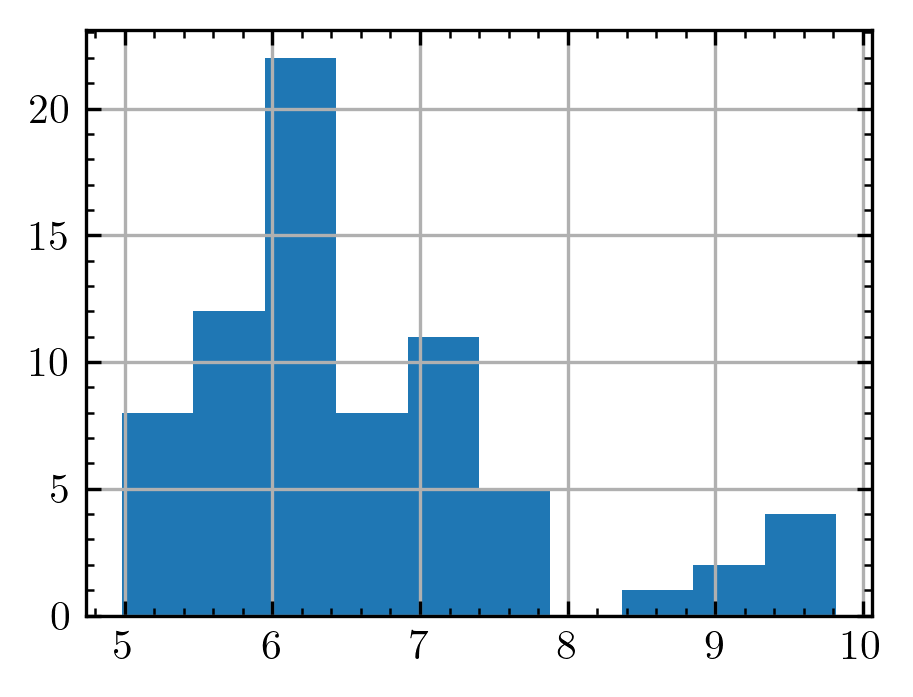

In [22]:
UCXBs['S2_mass_i'].hist()

In [18]:
UCXBs[initCols].describe()

,orbital_period_i,eccentricity_i,S2_mass_i,S2_log_R_i,S1_mass_i,S1_log_R_i
count,73.000000,73.0,73.000000,73.0,73.000000,73.0
mean,56.868423,0.0,6.614727,0.0,8.731964,0.0
std,74.200678,0.0,1.136029,0.0,2.342471,0.0
min,10.757749,0.0,4.980114,0.0,7.308563,0.0
25%,19.655951,0.0,5.912915,0.0,7.806480,0.0
50%,27.288075,0.0,6.267708,0.0,7.891966,0.0
75%,55.035621,0.0,7.099656,0.0,7.986023,0.0
max,468.301400,0.0,9.819122,0.0,19.006652,0.0


posydon-popsyn setup ucxb_grid_params_v_2.ini --job_array=50 --walltime=12:00:00 --partition=ciera-std --account=b1094 --email=piersonlipschultz@gmail.com --mem_per_cpu=10G


bash slurm_submit.sh